# Analyse d'une base de données des clients d'un grossiste 

## Présentation de la base de données

__L'ensemble de données comprend 6 variables sur 440 clients. Les valeurs sont quantitatives et sont les suivantes:__

- Fresh: dépenses annuelles en produits frais
- Milk: dépenses annuelles en produits laitiers
- Grocery: dépenses annuelles en produits d'épicerie
- Frozen: dépenses annuelles en produits surgelés
- Detergents_paper: dépenses annuelles en détergents et produits en papier
- Delicassen: dépenses annuelles en produits d'épicerie fine

In [111]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [138]:
# Import des données
data = pd.read_excel('MT15_exam_acp_classification.xls')
data.head()

Unnamed: 0  Fresh  Milk  Grocery  Frozen  Detergents_Paper  Delicassen
0   Client 1  12669  9656     7561     214              2674        1338
1   Client 2   7057  9810     9568    1762              3293        1776
2   Client 3   6353  8808     7684    2405              3516        7844
3   Client 4  13265  1196     4221    6404               507        1788
4   Client 5  22615  5410     7198    3915              1777        5185

## Enoncé

__1. Extraire les données quantitatives et présenter une synthèse des données.__

__2. Analyse ACP:__
   - Effectuer une analyse ACP avec deux dimensions, afficher les valeurs propres et les ratios de variance expliquée par chaque composante. 
   - Quelle quantité d'information est préservée dans ce cas ?
   - Afficher le graphique des individus et analyser.
   - Utiliser les métriques, que suggèrent chacune par rapport au nombre de dimensions à garder ? (justifier le raisonnement)
   - Calculer les contributions et les qualités de représentation des individus et des variables par rapport à chacun des            facteurs que vous avez gardés, et analyser.
   - Calculer les corrélations des variables avec chacun des axes, tracer le cercle des corrélations en prenant deux à deux les      facteurs que avez gardés et analyser.
   
__3. Classification__
   - Effectuer une classification Ascendente Hierarchique : tracer le dendrogramme, utiliser le tracé pour determiner le nombre de classe à retenir (justifier le raisonnement).
   - Effectuer une classification K-means en utilisant le nombre de classe retenue avec la CAH. 
   - Que suggère la métrique silhouette concernant le nombre de classes K-means ? (justifier le raisonnement)
   - Comparer les classes obtenues avec la CAH et les classes obtenues par K-means, analyser.
   - Etudier les classes obtenues par K-means, analyser les propriétés des clients qui composent chacune des classes.   

In [141]:
# Import de la librairie StandardScaler
from sklearn.preprocessing import StandardScaler

#Selection des variables quantitatives
data_qte = data.iloc[:,1:6].values
#Centrage réduction de nos données
data_cr = StandardScaler().fit_transform(data_qte)
data_cr

array([[ 0.05293319,  0.52356777, -0.04111489, -0.58936716, -0.04356873],
       [-0.39130197,  0.54445767,  0.17031835, -0.27013618,  0.08640684],
       [-0.44702926,  0.40853771, -0.0281571 , -0.13753572,  0.13323164],
       ...,
       [ 0.20032554,  1.31467078,  2.34838631, -0.54337975,  2.51121768],
       [-0.13538389, -0.51753572, -0.60251388, -0.41944059, -0.56977032],
       [-0.72930698, -0.5559243 , -0.57322717, -0.62009417, -0.50488752]])

In [149]:
# Import de la librairie ACP
from sklearn.decomposition import PCA as sklearnPCA

# Projection sur 2 axes
pca = sklearnPCA(n_components = 2)

 # Prédiction des scores des deux facteurs retenus
principalComponents = pca.fit_transform(data_cr)

#Recuperation des ratio de variance expliquée, attribués aux deux composantes (axe)
pca.explained_variance_ratio_

array([0.5099984 , 0.27916648])

In [150]:
# On récupère la variance de notre ACP
variance = pca.explained_variance_
print(variance)

[2.55580062 1.39901199]


In [151]:
# Et on s'en sert pour déterminer nos valeurs propres
eigval = variance*(len(data)-1)/len(data)
print(eigval)

[2.54999199 1.39583242]


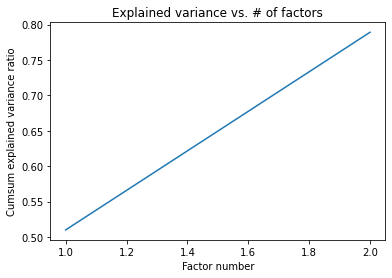

In [152]:
 # cumul de variance expliquée
plt.plot(np.arange(1,3),np.cumsum(pca.explained_variance_ratio_))
plt.title("Explained variance vs. # of factors")
plt.ylabel("Cumsum explained variance ratio")
plt.xlabel("Factor number")
plt.show()

# En les cumulant nous obtenons 0.77 soit 77% des données. Cette quantité d'information est acceptable

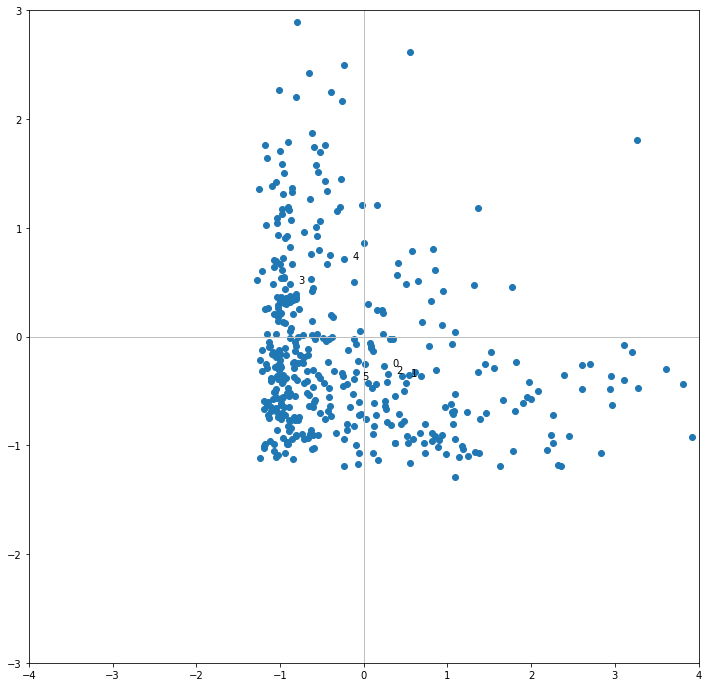

In [153]:
#positionnement des individus dans le premier plan
fig, axes = plt.subplots(figsize=(12,12))
axes.set_xlim(-4,4) #même limites en abscisse
axes.set_ylim(-3,3) #et en ordonnée

# placement des points
coord = principalComponents
plt.scatter(coord[:,0],coord[:,1])

#placement des étiquettes des observations
for i in range(6):
     plt.annotate(data.index[i],(coord[i,0]+0.1,coord[i,1]))
#ajouter les axes
plt.plot([-6,6],[0,0],color='silver',linestyle='-',linewidth=1)
plt.plot([0,0],[-6,6],color='silver',linestyle='-',linewidth=1)
#affichage
plt.show()

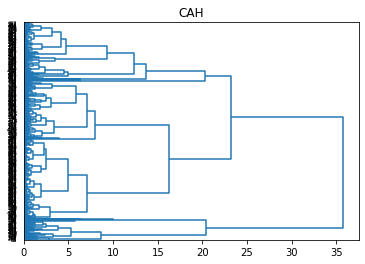

In [154]:
## CLASSIFICATION
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

#générer la matrice des liens

link = linkage(data_cr,method='ward',metric='euclidean')

#affichage du dendrogramme

plt.title("CAH")
dendrogram(link,labels=data.index,orientation='right',color_threshold=0)
plt.show()

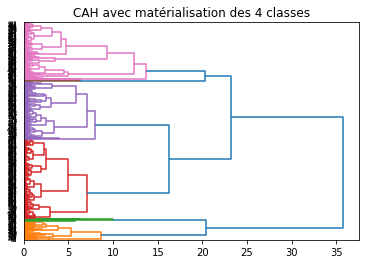

In [155]:
#Graphiquement, nous pouvons déduire 4 groupes qui se forment. On retiendra donc 5 classes
#matérialisation des 5 classes (hauteur t = 15)

plt.title('CAH avec matérialisation des 4 classes')
dendrogram(link,labels=data.index,orientation='right',color_threshold=15)
plt.show()

In [156]:
#k-means sur les données centrées et réduites

from sklearn import cluster
kmeans = cluster.KMeans(n_clusters=5)  # on choisit 4 avec l'étude du dessus
kmeans.fit(data_cr)

#index triés des groupes

print(kmeans.labels_)
idk = np.argsort(kmeans.labels_)

#affichage des observations et leurs groupes

print(pd.DataFrame(data.index[idk],kmeans.labels_[idk]))

[0 1 0 0 0 0 0 0 0 1 1 0 3 1 1 0 1 0 0 0 0 0 3 1 1 0 0 0 1 3 0 0 0 3 0 1 3
 1 1 3 3 0 1 1 1 1 1 4 1 1 0 0 3 1 3 0 4 1 0 0 0 4 0 1 0 4 0 1 0 0 0 1 0 3
 0 0 0 1 0 0 0 1 1 0 0 4 4 3 0 3 0 0 4 2 1 0 0 0 0 0 1 1 0 3 0 0 1 1 0 1 0
 1 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 3 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 1 0 0
 0 3 0 0 0 0 0 1 1 0 0 1 1 0 0 1 0 1 1 0 0 0 1 1 0 1 0 1 3 0 0 0 0 3 1 2 0
 0 0 0 1 1 0 0 0 1 0 0 3 1 0 0 1 1 3 0 0 1 0 0 0 1 0 4 0 0 1 1 1 0 1 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 3 3 0 0 0 0 1 0 0 0 0 0 4 0 3 0 3 0 0 3
 3 0 0 0 0 1 1 1 0 1 0 0 0 0 3 0 0 3 0 0 0 0 0 3 3 3 3 0 0 0 3 0 0 0 1 0 0
 0 0 0 0 0 1 1 1 1 1 1 0 0 1 0 3 1 0 0 1 0 0 0 1 0 0 0 0 3 2 0 0 0 0 0 1 0
 4 0 3 0 0 0 0 1 1 0 1 0 0 1 3 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 3 0 0 0 0 0 1 3 0 0 3 0 3 0 1 0 0 0 0 0 0 0 0 3 0 0 1 0 0 0 0 3 3 3 0 0 3
 1 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 1 3 0 0 0 0 0 0 0 3 3 1 0 0]
      0
0     0
0   272
0   271
0   270
0   269
..  ...
4    61
4    92
4   211
4    86
4   333

[440 rows 